# Settings

In [1]:
%env TF_KERAS = 1
import os
sep_local = os.path.sep
import sys
sys.path.append('..' + sep_local + '..' + sep_local + '..') # For Windows import
os.chdir('..' + sep_local + '..' + sep_local + '..') # For Linux import
print(sep_local)

env: TF_KERAS=1
/


In [2]:
import tensorflow as tf
print(tf.__version__)

2.1.0


# Dataset loading

In [3]:
dataset_name='pacman'

In [4]:
#images_dir = 'D:\\datasets\\Ms_Pacman\\Ms_Pacman\\Test\\'
images_dir = '/home/azeghost/datasets/.mspacman/atari_v1/screens/mspacman' #Linux
#images_dir = '..\..\..\\data\\atari_v1\\screens\\mspacman'
validation_percentage = 25
valid_format = 'png'

In [5]:
from training.generators.file_image_generator import create_image_lists, get_generators

Using TensorFlow backend.


In [6]:
imgs_list = create_image_lists(
    image_dir=images_dir, 
    validation_pct=validation_percentage, 
    valid_imgae_formats=valid_format
)

  DEBUG    | Looking for images in '393'
  INFO     | 5118 file found
  DEBUG    | Looking for images in '321'
  INFO     | 2564 file found
  DEBUG    | Looking for images in '182'
  INFO     | 2319 file found
  DEBUG    | Looking for images in '277'
  INFO     | 298 file found
  DEBUG    | Looking for images in '176'
  INFO     | 6342 file found
  DEBUG    | Looking for images in '363'
  INFO     | 3134 file found
  DEBUG    | Looking for images in '88'
  INFO     | 1265 file found
  DEBUG    | Looking for images in '91'
  INFO     | 3172 file found
  DEBUG    | Looking for images in '599'
  INFO     | 3325 file found
  DEBUG    | Looking for images in '633'
  INFO     | 1447 file found
  DEBUG    | Looking for images in '557'
  INFO     | 4142 file found


  DEBUG    | Looking for images in '212'
  INFO     | 7101 file found
  DEBUG    | Looking for images in '250'
  INFO     | 1127 file found
  DEBUG    | Looking for images in '10'
  INFO     | 1524 file found
  DEBUG    | Looking for images in '5'
  INFO     | 322 file found
  DEBUG    | Looking for images in '83'
  INFO     | 4731 file found
  DEBUG    | Looking for images in '568'
  INFO     | 4431 file found
  DEBUG    | Looking for images in '474'
  INFO     | 3032 file found
  DEBUG    | Looking for images in '523'
  INFO     | 1716 file found
  DEBUG    | Looking for images in '596'
  INFO     | 1307 file found
  DEBUG    | Looking for images in '427'
  INFO     | 5395 file found
  DEBUG    | Looking for images in '132'
  INFO     | 3288 file found
  DEBUG    | Looking for images in '360'


  INFO     | 346 file found
  DEBUG    | Looking for images in '95'
  INFO     | 1735 file found
  DEBUG    | Looking for images in '516'
  INFO     | 5110 file found
  DEBUG    | Looking for images in '634'
  INFO     | 6359 file found
  DEBUG    | Looking for images in '570'
  INFO     | 4564 file found
  DEBUG    | Looking for images in '451'
  INFO     | 4034 file found
  DEBUG    | Looking for images in '483'
  INFO     | 8589 file found
  DEBUG    | Looking for images in '407'


  INFO     | 8201 file found
  DEBUG    | Looking for images in '620'
  INFO     | 1524 file found
  DEBUG    | Looking for images in '364'
  INFO     | 4880 file found
  DEBUG    | Looking for images in '586'
  INFO     | 8899 file found
  DEBUG    | Looking for images in '538'
  INFO     | 3005 file found
  DEBUG    | Looking for images in '401'
  INFO     | 7305 file found
  DEBUG    | Looking for images in '271'
  INFO     | 3061 file found


  DEBUG    | Looking for images in '192'
  INFO     | 1811 file found
  DEBUG    | Looking for images in '180'
  INFO     | 6810 file found
  DEBUG    | Looking for images in '565'
  INFO     | 320 file found
  DEBUG    | Looking for images in '421'
  INFO     | 3821 file found
  DEBUG    | Looking for images in '148'
  INFO     | 2121 file found
  DEBUG    | Looking for images in '544'
  INFO     | 2348 file found
  DEBUG    | Looking for images in '127'
  INFO     | 4233 file found
  DEBUG    | Looking for images in '53'
  INFO     | 277 file found
  DEBUG    | Looking for images in '287'
  INFO     | 6505 file found
  DEBUG    | Looking for images in '257'
  INFO     | 2865 file found
  DEBUG    | Looking for images in '382'


  INFO     | 11511 file found
  DEBUG    | Looking for images in '394'
  INFO     | 4584 file found
  DEBUG    | Looking for images in '236'
  INFO     | 2877 file found
  DEBUG    | Looking for images in '223'
  INFO     | 3084 file found
  DEBUG    | Looking for images in '511'
  INFO     | 3202 file found
  DEBUG    | Looking for images in '600'
  INFO     | 3397 file found
  DEBUG    | Looking for images in '184'
  INFO     | 5399 file found
  DEBUG    | Looking for images in '149'


  INFO     | 5645 file found
  DEBUG    | Looking for images in '172'
  INFO     | 773 file found
  DEBUG    | Looking for images in '607'
  INFO     | 304 file found
  DEBUG    | Looking for images in '351'
  INFO     | 3491 file found
  DEBUG    | Looking for images in '519'
  INFO     | 3842 file found
  DEBUG    | Looking for images in '534'
  INFO     | 2072 file found
  DEBUG    | Looking for images in '504'
  INFO     | 1924 file found
  DEBUG    | Looking for images in '597'
  INFO     | 4600 file found
  DEBUG    | Looking for images in '433'
  INFO     | 1392 file found
  DEBUG    | Looking for images in '424'
  INFO     | 2359 file found
  DEBUG    | Looking for images in '339'
  INFO     | 276 file found
  DEBUG    | Looking for images in '260'
  INFO     | 3698 file found
  DEBUG    | Looking for images in '602'
  INFO     | 4201 file found


  DEBUG    | Looking for images in '514'
  INFO     | 4381 file found
  DEBUG    | Looking for images in '97'
  INFO     | 5357 file found
  DEBUG    | Looking for images in '520'
  INFO     | 9374 file found
  DEBUG    | Looking for images in '125'
  INFO     | 2506 file found
  DEBUG    | Looking for images in '425'
  INFO     | 8961 file found
  DEBUG    | Looking for images in '574'
  INFO     | 3441 file found
  DEBUG    | Looking for images in '255'


  INFO     | 7923 file found
  DEBUG    | Looking for images in '350'
  INFO     | 4432 file found
  DEBUG    | Looking for images in '558'
  INFO     | 5580 file found
  DEBUG    | Looking for images in '25'
  INFO     | 5930 file found
  DEBUG    | Looking for images in '583'
  INFO     | 4492 file found
  DEBUG    | Looking for images in '292'
  INFO     | 5082 file found
  DEBUG    | Looking for images in '615'
  INFO     | 4451 file found


  DEBUG    | Looking for images in '594'
  INFO     | 4196 file found
  DEBUG    | Looking for images in '432'
  INFO     | 3211 file found
  DEBUG    | Looking for images in '443'
  INFO     | 5455 file found
  DEBUG    | Looking for images in '507'
  INFO     | 3562 file found
  DEBUG    | Looking for images in '35'
  INFO     | 5018 file found
  DEBUG    | Looking for images in '398'
  INFO     | 290 file found
  DEBUG    | Looking for images in '458'
  INFO     | 3932 file found
  DEBUG    | Looking for images in '467'
  INFO     | 6221 file found
  DEBUG    | Looking for images in '592'
  INFO     | 341 file found


  DEBUG    | Looking for images in '560'
  INFO     | 5729 file found
  DEBUG    | Looking for images in '326'
  INFO     | 5250 file found
  DEBUG    | Looking for images in '76'
  INFO     | 4365 file found
  DEBUG    | Looking for images in '587'
  INFO     | 6660 file found
  DEBUG    | Looking for images in '422'
  INFO     | 7558 file found
  DEBUG    | Looking for images in '610'


  INFO     | 3530 file found
  DEBUG    | Looking for images in '325'
  INFO     | 5057 file found
  DEBUG    | Looking for images in '510'
  INFO     | 4658 file found
  DEBUG    | Looking for images in '242'
  INFO     | 1145 file found
  DEBUG    | Looking for images in '169'
  INFO     | 14566 file found
  DEBUG    | Looking for images in '388'
  INFO     | 3450 file found
  DEBUG    | Looking for images in '52'


  INFO     | 4201 file found
  DEBUG    | Looking for images in '480'
  INFO     | 2888 file found
  DEBUG    | Looking for images in '611'
  INFO     | 280 file found
  DEBUG    | Looking for images in '540'
  INFO     | 2643 file found
  DEBUG    | Looking for images in '526'
  INFO     | 5315 file found
  DEBUG    | Looking for images in '82'
  INFO     | 5004 file found
  DEBUG    | Looking for images in '517'
  INFO     | 4906 file found
  DEBUG    | Looking for images in '631'
  INFO     | 4761 file found
  DEBUG    | Looking for images in '85'
  INFO     | 5095 file found
  DEBUG    | Looking for images in '237'


  INFO     | 5985 file found
  DEBUG    | Looking for images in '531'
  INFO     | 10083 file found
  DEBUG    | Looking for images in '470'
  INFO     | 4701 file found
  DEBUG    | Looking for images in '78'
  INFO     | 3519 file found
  DEBUG    | Looking for images in '77'
  INFO     | 923 file found
  DEBUG    | Looking for images in '499'
  INFO     | 10829 file found
  DEBUG    | Looking for images in '19'


  INFO     | 5034 file found
  DEBUG    | Looking for images in '289'
  INFO     | 302 file found
  DEBUG    | Looking for images in '448'
  INFO     | 4619 file found
  DEBUG    | Looking for images in '312'
  INFO     | 467 file found
  DEBUG    | Looking for images in '303'
  INFO     | 5976 file found
  DEBUG    | Looking for images in '428'
  INFO     | 4630 file found
  DEBUG    | Looking for images in '96'
  INFO     | 625 file found
  DEBUG    | Looking for images in '438'
  INFO     | 273 file found
  DEBUG    | Looking for images in '115'
  INFO     | 1247 file found
  DEBUG    | Looking for images in '456'
  INFO     | 2946 file found
  DEBUG    | Looking for images in '239'
  INFO     | 2387 file found
  DEBUG    | Looking for images in '389'
  INFO     | 5314 file found
  DEBUG    | Looking for images in '403'


  INFO     | 5842 file found
  DEBUG    | Looking for images in '533'
  INFO     | 1611 file found
  DEBUG    | Looking for images in '215'
  INFO     | 324 file found
  DEBUG    | Looking for images in '123'
  INFO     | 2270 file found
  DEBUG    | Looking for images in '206'
  INFO     | 7654 file found
  DEBUG    | Looking for images in '267'
  INFO     | 8242 file found
  DEBUG    | Looking for images in '630'
  INFO     | 5585 file found
  DEBUG    | Looking for images in '436'
  INFO     | 5236 file found
  DEBUG    | Looking for images in '365'


  INFO     | 338 file found
  DEBUG    | Looking for images in '29'
  INFO     | 3026 file found
  DEBUG    | Looking for images in '1'
  INFO     | 6442 file found
  DEBUG    | Looking for images in '348'
  INFO     | 1527 file found
  DEBUG    | Looking for images in '273'
  INFO     | 4661 file found
  DEBUG    | Looking for images in '24'
  INFO     | 355 file found
  DEBUG    | Looking for images in '238'
  INFO     | 1432 file found
  DEBUG    | Looking for images in '613'
  INFO     | 4480 file found
  DEBUG    | Looking for images in '189'
  INFO     | 540 file found
  DEBUG    | Looking for images in '144'
  INFO     | 3158 file found
  DEBUG    | Looking for images in '580'
  INFO     | 5881 file found
  DEBUG    | Looking for images in '573'


  INFO     | 4964 file found
  DEBUG    | Looking for images in '423'
  INFO     | 656 file found
  DEBUG    | Looking for images in '463'
  INFO     | 4305 file found
  DEBUG    | Looking for images in '414'
  INFO     | 4233 file found
  DEBUG    | Looking for images in '61'
  INFO     | 5972 file found
  DEBUG    | Looking for images in '270'
  INFO     | 410 file found
  DEBUG    | Looking for images in '506'
  INFO     | 3262 file found
  DEBUG    | Looking for images in '638'
  INFO     | 6415 file found
  DEBUG    | Looking for images in '56'


  INFO     | 8197 file found
  DEBUG    | Looking for images in '297'
  INFO     | 3662 file found
  DEBUG    | Looking for images in '536'
  INFO     | 4393 file found
  DEBUG    | Looking for images in '90'
  INFO     | 7121 file found
  DEBUG    | Looking for images in '68'
  INFO     | 4734 file found
  DEBUG    | Looking for images in '532'
  INFO     | 7192 file found
  DEBUG    | Looking for images in '328'


  INFO     | 3187 file found
  DEBUG    | Looking for images in '420'
  INFO     | 346 file found
  DEBUG    | Looking for images in '567'
  INFO     | 8548 file found
  DEBUG    | Looking for images in '60'
  INFO     | 5953 file found
  DEBUG    | Looking for images in '193'
  INFO     | 4688 file found
  DEBUG    | Looking for images in '457'
  INFO     | 7550 file found
  DEBUG    | Looking for images in '637'
  INFO     | 3707 file found
  DEBUG    | Looking for images in '153'


  INFO     | 9353 file found
  DEBUG    | Looking for images in '547'
  INFO     | 2501 file found
  DEBUG    | Looking for images in '408'
  INFO     | 8527 file found
  DEBUG    | Looking for images in '572'
  INFO     | 4099 file found
  DEBUG    | Looking for images in '136'
  INFO     | 5027 file found
  DEBUG    | Looking for images in '15'
  INFO     | 5278 file found
  DEBUG    | Looking for images in '65'
  INFO     | 2512 file found


  DEBUG    | Looking for images in '641'
  INFO     | 6726 file found
  DEBUG    | Looking for images in '216'
  INFO     | 3064 file found
  DEBUG    | Looking for images in '358'
  INFO     | 3528 file found
  DEBUG    | Looking for images in '579'
  INFO     | 6725 file found
  DEBUG    | Looking for images in '518'
  INFO     | 6025 file found
  DEBUG    | Looking for images in '248'
  INFO     | 5234 file found
  DEBUG    | Looking for images in '3'
  INFO     | 325 file found
  DEBUG    | Looking for images in '498'
  INFO     | 285 file found
  DEBUG    | Looking for images in '40'


  INFO     | 6261 file found
  DEBUG    | Looking for images in '92'
  INFO     | 8177 file found
  DEBUG    | Looking for images in '598'
  INFO     | 2112 file found
  DEBUG    | Looking for images in '245'
  INFO     | 333 file found
  DEBUG    | Looking for images in '601'
  INFO     | 2777 file found
  DEBUG    | Looking for images in '639'
  INFO     | 6005 file found
  DEBUG    | Looking for images in '282'
  INFO     | 1893 file found
  DEBUG    | Looking for images in '285'
  INFO     | 3162 file found
  DEBUG    | Looking for images in '562'
  INFO     | 2867 file found


  DEBUG    | Looking for images in '119'
  INFO     | 8341 file found
  DEBUG    | Looking for images in '129'
  INFO     | 4530 file found
  DEBUG    | Looking for images in '120'
  INFO     | 3433 file found
  DEBUG    | Looking for images in '411'
  INFO     | 5107 file found
  DEBUG    | Looking for images in '218'
  INFO     | 2823 file found
  DEBUG    | Looking for images in '175'
  INFO     | 6611 file found
  DEBUG    | Looking for images in '603'
  INFO     | 5458 file found
  DEBUG    | Looking for images in '550'
  INFO     | 477 file found
  DEBUG    | Looking for images in '482'


  INFO     | 6667 file found
  DEBUG    | Looking for images in '8'
  INFO     | 1569 file found
  DEBUG    | Looking for images in '392'
  INFO     | 3602 file found
  DEBUG    | Looking for images in '346'
  INFO     | 2841 file found
  DEBUG    | Looking for images in '21'
  INFO     | 3297 file found
  DEBUG    | Looking for images in '121'
  INFO     | 394 file found
  DEBUG    | Looking for images in '202'
  INFO     | 5576 file found
  DEBUG    | Looking for images in '563'
  INFO     | 4496 file found
  DEBUG    | Looking for images in '478'
  INFO     | 5475 file found
  DEBUG    | Looking for images in '347'
  INFO     | 602 file found
  DEBUG    | Looking for images in '219'


  INFO     | 2704 file found
  DEBUG    | Looking for images in '435'
  INFO     | 3727 file found
  DEBUG    | Looking for images in '396'
  INFO     | 6368 file found
  DEBUG    | Looking for images in '9'
  INFO     | 1961 file found
  DEBUG    | Looking for images in '397'
  INFO     | 906 file found
  DEBUG    | Looking for images in '138'
  INFO     | 6003 file found
  DEBUG    | Looking for images in '167'
  INFO     | 280 file found
  DEBUG    | Looking for images in '32'
  INFO     | 274 file found
  DEBUG    | Looking for images in '402'
  INFO     | 5398 file found
  DEBUG    | Looking for images in '117'
  INFO     | 6261 file found
  DEBUG    | Looking for images in '135'


  INFO     | 633 file found
  DEBUG    | Looking for images in '209'
  INFO     | 294 file found
  DEBUG    | Looking for images in '429'
  INFO     | 3950 file found
  DEBUG    | Looking for images in '2'
  INFO     | 1305 file found
  DEBUG    | Looking for images in '13'
  INFO     | 5005 file found
  DEBUG    | Looking for images in '415'
  INFO     | 1830 file found
  DEBUG    | Looking for images in '444'
  INFO     | 1556 file found
  DEBUG    | Looking for images in '63'
  INFO     | 6821 file found
  DEBUG    | Looking for images in '31'
  INFO     | 4473 file found
  DEBUG    | Looking for images in '299'
  INFO     | 5379 file found
  DEBUG    | Looking for images in '140'


  INFO     | 2825 file found
  DEBUG    | Looking for images in '33'
  INFO     | 297 file found
  DEBUG    | Looking for images in '210'
  INFO     | 1687 file found
  DEBUG    | Looking for images in '291'
  INFO     | 5212 file found
  DEBUG    | Looking for images in '114'
  INFO     | 6748 file found
  DEBUG    | Looking for images in '317'
  INFO     | 5111 file found
  DEBUG    | Looking for images in '107'
  INFO     | 8293 file found
  DEBUG    | Looking for images in '527'
  INFO     | 770 file found
  DEBUG    | Looking for images in '525'
  INFO     | 3206 file found
  DEBUG    | Looking for images in '524'


  INFO     | 778 file found
  DEBUG    | Looking for images in '640'
  INFO     | 2401 file found
  DEBUG    | Looking for images in '81'
  INFO     | 10113 file found
  DEBUG    | Looking for images in '577'
  INFO     | 6116 file found
  DEBUG    | Looking for images in '186'
  INFO     | 3312 file found
  DEBUG    | Looking for images in '110'
  INFO     | 7136 file found
  DEBUG    | Looking for images in '588'


  INFO     | 5172 file found
  DEBUG    | Looking for images in '314'
  INFO     | 11215 file found
  DEBUG    | Looking for images in '316'
  INFO     | 4033 file found
  DEBUG    | Looking for images in '261'
  INFO     | 4055 file found
  DEBUG    | Looking for images in '323'
  INFO     | 969 file found
  DEBUG    | Looking for images in '552'
  INFO     | 5637 file found
  DEBUG    | Looking for images in '515'
  INFO     | 5016 file found
  DEBUG    | Looking for images in '69'


  INFO     | 3419 file found
  DEBUG    | Looking for images in '453'
  INFO     | 3989 file found
  DEBUG    | Looking for images in '11'
  INFO     | 3140 file found
  DEBUG    | Looking for images in '179'
  INFO     | 7146 file found
  DEBUG    | Looking for images in '133'
  INFO     | 4344 file found
  DEBUG    | Looking for images in '623'
  INFO     | 3465 file found
  DEBUG    | Looking for images in '66'
  INFO     | 3297 file found
  DEBUG    | Looking for images in '400'
  INFO     | 2277 file found
  DEBUG    | Looking for images in '157'
  INFO     | 288 file found
  DEBUG    | Looking for images in '168'
  INFO     | 5732 file found


  DEBUG    | Looking for images in '190'
  INFO     | 3846 file found
  DEBUG    | Looking for images in '582'
  INFO     | 1094 file found
  DEBUG    | Looking for images in '466'
  INFO     | 9046 file found
  DEBUG    | Looking for images in '126'
  INFO     | 3617 file found
  DEBUG    | Looking for images in '564'
  INFO     | 2199 file found
  DEBUG    | Looking for images in '241'
  INFO     | 7788 file found
  DEBUG    | Looking for images in '390'
  INFO     | 3200 file found
  DEBUG    | Looking for images in '430'
  INFO     | 2424 file found


  DEBUG    | Looking for images in '404'
  INFO     | 289 file found
  DEBUG    | Looking for images in '434'
  INFO     | 1137 file found
  DEBUG    | Looking for images in '36'
  INFO     | 5176 file found
  DEBUG    | Looking for images in '93'
  INFO     | 2906 file found
  DEBUG    | Looking for images in '203'
  INFO     | 1922 file found
  DEBUG    | Looking for images in '628'
  INFO     | 4386 file found
  DEBUG    | Looking for images in '446'
  INFO     | 2708 file found
  DEBUG    | Looking for images in '553'
  INFO     | 4392 file found
  DEBUG    | Looking for images in '367'
  INFO     | 702 file found
  DEBUG    | Looking for images in '399'
  INFO     | 4437 file found
  DEBUG    | Looking for images in '30'
  INFO     | 2413 file found
  DEBUG    | Looking for images in '619'


  INFO     | 7745 file found
  DEBUG    | Looking for images in '7'
  INFO     | 2089 file found
  DEBUG    | Looking for images in '103'
  INFO     | 6976 file found
  DEBUG    | Looking for images in '352'
  INFO     | 7764 file found
  DEBUG    | Looking for images in '204'
  INFO     | 4800 file found
  DEBUG    | Looking for images in '64'
  INFO     | 7911 file found
  DEBUG    | Looking for images in '281'


  INFO     | 5051 file found
  DEBUG    | Looking for images in '98'
  INFO     | 3175 file found
  DEBUG    | Looking for images in '39'
  INFO     | 4235 file found
  DEBUG    | Looking for images in '330'
  INFO     | 5329 file found
  DEBUG    | Looking for images in '496'
  INFO     | 294 file found
  DEBUG    | Looking for images in '278'
  INFO     | 2623 file found
  DEBUG    | Looking for images in '419'
  INFO     | 4462 file found
  DEBUG    | Looking for images in '546'
  INFO     | 4387 file found


  DEBUG    | Looking for images in '304'
  INFO     | 3843 file found
  DEBUG    | Looking for images in '522'
  INFO     | 6363 file found
  DEBUG    | Looking for images in '413'
  INFO     | 3240 file found
  DEBUG    | Looking for images in '595'
  INFO     | 3959 file found
  DEBUG    | Looking for images in '589'
  INFO     | 3959 file found
  DEBUG    | Looking for images in '369'
  INFO     | 7538 file found


  DEBUG    | Looking for images in '575'
  INFO     | 4055 file found
  DEBUG    | Looking for images in '141'
  INFO     | 6472 file found
  DEBUG    | Looking for images in '62'
  INFO     | 5108 file found
  DEBUG    | Looking for images in '14'
  INFO     | 2006 file found
  DEBUG    | Looking for images in '471'
  INFO     | 7228 file found
  DEBUG    | Looking for images in '94'
  INFO     | 3089 file found
  DEBUG    | Looking for images in '173'
  INFO     | 1545 file found
  DEBUG    | Looking for images in '224'
  INFO     | 5715 file found
  DEBUG    | Looking for images in '100'


  INFO     | 535 file found
  DEBUG    | Looking for images in '187'
  INFO     | 2964 file found
  DEBUG    | Looking for images in '548'
  INFO     | 625 file found
  DEBUG    | Looking for images in '395'
  INFO     | 4925 file found
  DEBUG    | Looking for images in '147'
  INFO     | 6933 file found
  DEBUG    | Looking for images in '177'
  INFO     | 2114 file found
  DEBUG    | Looking for images in '294'
  INFO     | 5131 file found
  DEBUG    | Looking for images in '584'
  INFO     | 6004 file found


  DEBUG    | Looking for images in '484'
  INFO     | 3479 file found
  DEBUG    | Looking for images in '112'
  INFO     | 4181 file found
  DEBUG    | Looking for images in '625'
  INFO     | 3752 file found
  DEBUG    | Looking for images in '624'
  INFO     | 293 file found
  DEBUG    | Looking for images in '616'
  INFO     | 10032 file found
  DEBUG    | Looking for images in '139'
  INFO     | 5656 file found
  DEBUG    | Looking for images in '302'
  INFO     | 6115 file found
  DEBUG    | Looking for images in '593'
  INFO     | 774 file found
  DEBUG    | Looking for images in '171'


  INFO     | 4558 file found
  DEBUG    | Looking for images in '554'
  INFO     | 810 file found
  DEBUG    | Looking for images in '99'
  INFO     | 2539 file found
  DEBUG    | Looking for images in '452'
  INFO     | 4527 file found
  DEBUG    | Looking for images in '309'
  INFO     | 5758 file found
  DEBUG    | Looking for images in '67'
  INFO     | 4988 file found
  DEBUG    | Looking for images in '324'
  INFO     | 4936 file found
  DEBUG    | Looking for images in '581'
  INFO     | 2413 file found
  DEBUG    | Looking for images in '353'


  INFO     | 4486 file found
  DEBUG    | Looking for images in '48'
  INFO     | 2694 file found
  DEBUG    | Looking for images in '86'
  INFO     | 3449 file found
  DEBUG    | Looking for images in '174'
  INFO     | 899 file found
  DEBUG    | Looking for images in '18'
  INFO     | 6824 file found
  DEBUG    | Looking for images in '621'
  INFO     | 4223 file found
  DEBUG    | Looking for images in '410'
  INFO     | 3254 file found
  DEBUG    | Looking for images in '477'
  INFO     | 3327 file found
  DEBUG    | Looking for images in '240'
  INFO     | 3115 file found
  DEBUG    | Looking for images in '333'
  INFO     | 4890 file found
  DEBUG    | Looking for images in '635'


  INFO     | 4681 file found
  DEBUG    | Looking for images in '412'
  INFO     | 2846 file found
  DEBUG    | Looking for images in '334'
  INFO     | 2475 file found
  DEBUG    | Looking for images in '585'
  INFO     | 3641 file found
  DEBUG    | Looking for images in '12'
  INFO     | 4174 file found
  DEBUG    | Looking for images in '612'
  INFO     | 4354 file found
  DEBUG    | Looking for images in '131'
  INFO     | 567 file found
  DEBUG    | Looking for images in '559'
  INFO     | 4477 file found
  DEBUG    | Looking for images in '87'
  INFO     | 4554 file found
  DEBUG    | Looking for images in '84'


  INFO     | 4900 file found
  DEBUG    | Looking for images in '300'
  INFO     | 7125 file found
  DEBUG    | Looking for images in '359'
  INFO     | 278 file found
  DEBUG    | Looking for images in '256'
  INFO     | 5383 file found
  DEBUG    | Looking for images in '80'
  INFO     | 5566 file found
  DEBUG    | Looking for images in '249'
  INFO     | 332 file found
  DEBUG    | Looking for images in '259'
  INFO     | 2159 file found
  DEBUG    | Looking for images in '405'
  INFO     | 1115 file found
  DEBUG    | Looking for images in '263'
  INFO     | 5089 file found
  DEBUG    | Looking for images in '178'


  INFO     | 11830 file found
  DEBUG    | Looking for images in '102'
  INFO     | 5777 file found
  DEBUG    | Looking for images in '274'
  INFO     | 8199 file found
  DEBUG    | Looking for images in '462'
  INFO     | 5043 file found
  DEBUG    | Looking for images in '183'
  INFO     | 7139 file found
  DEBUG    | Looking for images in '461'


  INFO     | 4317 file found
  DEBUG    | Looking for images in '535'
  INFO     | 2202 file found
  DEBUG    | Looking for images in '79'
  INFO     | 3857 file found
  DEBUG    | Looking for images in '370'
  INFO     | 3638 file found
  DEBUG    | Looking for images in '188'
  INFO     | 6409 file found
  DEBUG    | Looking for images in '142'
  INFO     | 9162 file found
  DEBUG    | Looking for images in '113'
  INFO     | 5912 file found
  DEBUG    | Looking for images in '162'


  INFO     | 4168 file found
  DEBUG    | Looking for images in '150'
  INFO     | 10518 file found
  DEBUG    | Looking for images in '368'
  INFO     | 272 file found
  DEBUG    | Looking for images in '152'
  INFO     | 3481 file found
  DEBUG    | Looking for images in '151'
  INFO     | 9733 file found
  DEBUG    | Looking for images in '134'
  INFO     | 2964 file found
  DEBUG    | Looking for images in '47'
  INFO     | 1655 file found
  DEBUG    | Looking for images in '329'
  INFO     | 283 file found
  DEBUG    | Looking for images in '116'
  INFO     | 2628 file found
  DEBUG    | Looking for images in '521'


  INFO     | 5753 file found
  DEBUG    | Looking for images in '561'
  INFO     | 6445 file found


In [7]:
scale=2
inputs_shape=image_size=(160, 210, 3)#(160//scale, 210//scale, 3)

latents_dim = 50
intermediate_dim = 50
batch_size = 32
EPIS_LEN = 10
EPIS_SHIFT = 5

In [9]:
training_generator, testing_generator = get_generators(
    images_list=imgs_list, 
    image_dir=images_dir, 
    image_size=image_size, 
    batch_size=batch_size, 
    class_mode='episode_flat', 
    episode_len=EPIS_LEN, 
    episode_shift=EPIS_SHIFT
)

  INFO     | Found 1177538 training files


  INFO     | Found 383441 validation files


In [10]:
import tensorflow as tf

In [11]:
_instance_scale=1.0
for data in training_generator:
    _instance_scale = float(data[0].numpy().max())
    break

2
(100, 160, 210, 3)
(100, 160, 210, 3)


In [12]:
train_ds = tf.data.Dataset.from_generator(
    lambda: training_generator, 
    output_types=(tf.float32, tf.float32) ,
    output_shapes=(tf.TensorShape((batch_size* EPIS_LEN, ) + image_size), 
                   tf.TensorShape((batch_size* EPIS_LEN, ) + image_size)
                  )
)

test_ds = tf.data.Dataset.from_generator(
    lambda: testing_generator,     
    output_types=(tf.float32, tf.float32) ,
    output_shapes=(tf.TensorShape((batch_size* EPIS_LEN, ) + image_size), 
                   tf.TensorShape((batch_size* EPIS_LEN, ) + image_size)
                  )
)

In [14]:
import numpy as np
from collections.abc import Iterable
if isinstance(inputs_shape, Iterable):
    _outputs_shape = np.prod(inputs_shape)

In [ ]:
_outputs_shape

# Model's Layers definition

In [15]:
enc_lays = [tf.keras.layers.Dense(units=intermediate_dim//2, activation='relu'),
            tf.keras.layers.Dense(units=intermediate_dim//2, activation='relu'),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(units=latents_dim)]

dec_lays = [tf.keras.layers.Dense(units=latents_dim, activation='relu'),
            tf.keras.layers.Dense(units=3*intermediate_dim//2, activation='relu'),
            tf.keras.layers.Dense(units=_outputs_shape),
            tf.keras.layers.Reshape(inputs_shape)]

# Model definition

In [16]:
model_name = dataset_name+'Trans_Dense_AE'
#windows
#experiments_dir='..'+sep_local+'..'+sep_local+'..'+sep_local+'experiments'+sep_local + model_name

#linux 
experiments_dir=os.getcwd()+ sep_local  +'experiments'+sep_local + model_name

In [17]:
from training.autoencoding_basic.transformative.AE import autoencoder as AE

In [18]:
variables_params = \
[
    {
        'name': 'inference', 
        'inputs_shape':inputs_shape,
        'outputs_shape':latents_dim,
        'layers': enc_lays
    }

    ,
    
        {
        'name': 'generative', 
        'inputs_shape':latents_dim,
        'outputs_shape':inputs_shape,
        'layers':dec_lays
    }
]

In [19]:
from os.path import abspath
from utils.data_and_files.file_utils import create_if_not_exist
_restore = os.path.join(experiments_dir, 'var_save_dir')
create_if_not_exist(_restore)
absolute = abspath(_restore)
print("Restore_dir",absolute)
absolute = abspath(experiments_dir)
print("Recording_dir",absolute)
print("Current working dir",os.getcwd())

Restore_dir /home/azeghost/git/new_GAN_models/Generative_Models/experiments/pacmanTrans_AE/var_save_dir


In [21]:
ae = AE( 
    name=model_name,
    latents_dim=latents_dim,
    batch_size=batch_size,
    variables_params=variables_params, 
    filepath=None#to restore trained model, set filepath=_restore
    )

  WARNING  | None
  WARNING  | None


Model: "inference"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inference_inputs (InputLayer [(None, 160, 210, 3)]     0         
_________________________________________________________________
dense (Dense)                (None, 160, 210, 25)      100       
_________________________________________________________________
dense_1 (Dense)              (None, 160, 210, 25)      650       
_________________________________________________________________
flatten (Flatten)            (None, 840000)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                42000050  
_________________________________________________________________
batch_normalization (BatchNo (None, 50)                200       
_________________________________________________________________
dropout (Dropout)            (None, 50)                0 

In [22]:
ae.compile()

Model: "pacmanTrans_AE"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inference_inputs (InputLayer [(None, 160, 210, 3)]     0         
_________________________________________________________________
inference (Model)            (None, 50)                42001000  
_________________________________________________________________
generative (Model)           (None, 160, 210, 3)       7667187   
_________________________________________________________________
tf_op_layer_x_logits (Tensor [(None, 160, 210, 3)]     0         
Total params: 49,668,187
Trainable params: 49,668,081
Non-trainable params: 106
_________________________________________________________________
None


# Callbacks

In [23]:
# added for linux warning suppression
import logging
mpl_logger = logging.getLogger('matplotlib')
mpl_logger.setLevel(logging.WARNING)



from training.callbacks.sample_generation import SampleGeneration
from training.callbacks.save_model import ModelSaver

In [25]:
es = tf.keras.callbacks.EarlyStopping(
    monitor='loss', 
    min_delta=1e-12, 
    patience=5, 
    verbose=1, 
    restore_best_weights=True
)

In [26]:
ms = ModelSaver(filepath=_restore,save_freq=5)

In [27]:
csv_dir = os.path.join(experiments_dir, 'csv_dir')
create_if_not_exist(csv_dir)
csv_dir = os.path.join(csv_dir, model_name+'.csv')
csv_log = tf.keras.callbacks.CSVLogger(csv_dir, append=True)
absolute = abspath(csv_dir)
print("Csv_dir",absolute)

Csv_dir /home/azeghost/git/new_GAN_models/Generative_Models/experiments/pacmanTrans_AE/csv_dir/pacmanTrans_AE.csv


In [28]:
image_gen_dir = os.path.join(experiments_dir, 'image_gen_dir')
create_if_not_exist(image_gen_dir)
absolute = abspath(image_gen_dir)
print("Image_gen_dir",absolute)

Image_gen_dir /home/azeghost/git/new_GAN_models/Generative_Models/experiments/pacmanTrans_AE/image_gen_dir


In [29]:
sg = SampleGeneration(latents_shape=latents_dim, filepath=image_gen_dir, gen_freq=5, save_img=True, gray_plot=False)

# Model Training

In [30]:
ae.fit(
    x=train_ds,
    input_kw=None,
    steps_per_epoch=1000,
    epochs=int(1e6), 
    verbose=2,
    callbacks=[ es, ms, csv_log, sg],
    workers=-1,
    use_multiprocessing=True
)

# prediction preview

In [32]:
for batch in test_ds:
    break

In [33]:
import matplotlib.pyplot as plt

In [34]:
xt0 = batch[0][:10]
xt1 = batch[1][:10]

In [35]:
xt0 = tf.concat([x for x in xt0], axis=1)
xt1 = tf.concat([x for x in xt1], axis=1)

In [36]:
xt1_pred = ae.predict(batch[0][:10])
xt1_pred = tf.concat([x for x in xt1_pred], axis=1)

input


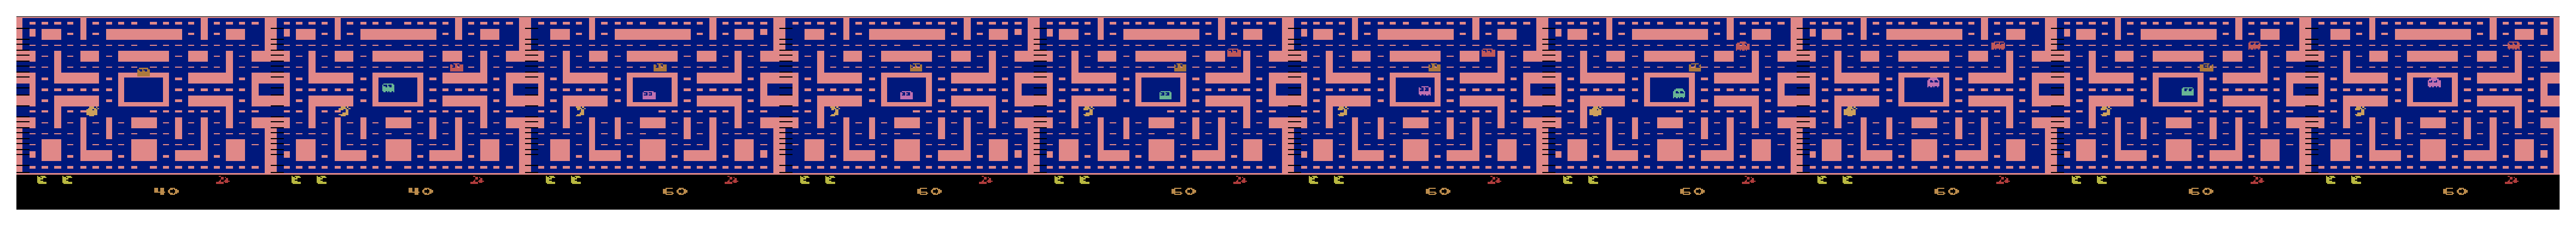

output


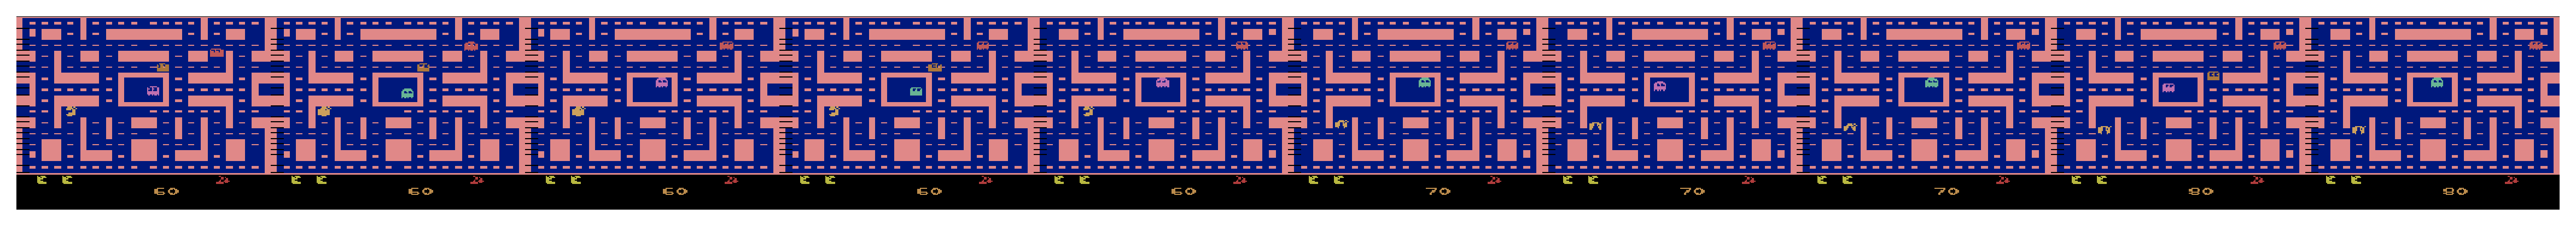

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


prediction


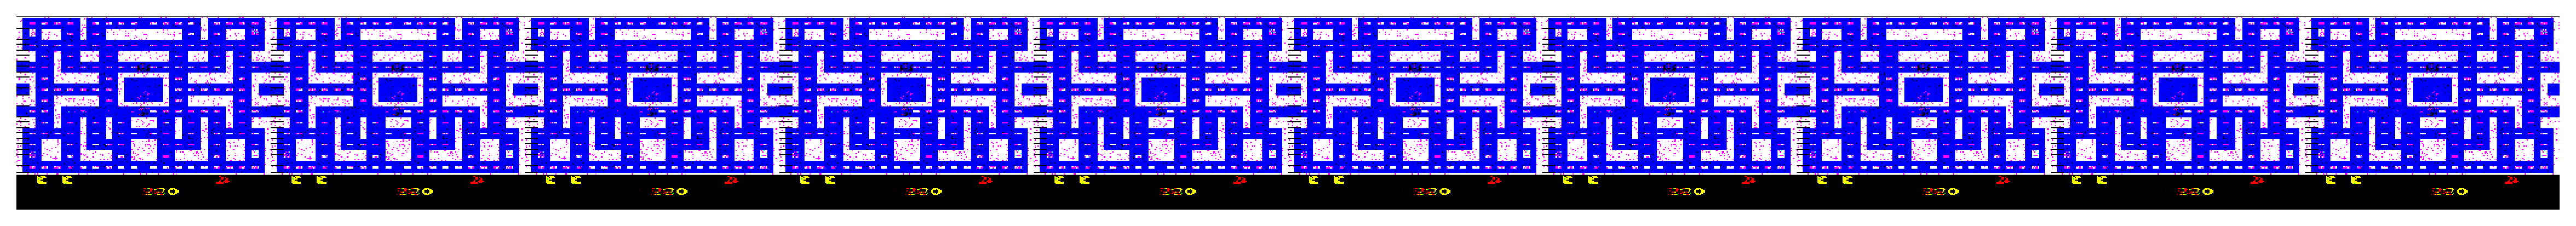

In [37]:
plt.figure(figsize=(20, 80), dpi=300)
plt.axis('off')
print('input')
plt.imshow(xt0)
#plt.save()
plt.show()


plt.figure(figsize=(20, 80), dpi=300)
plt.axis('off')
print('output')
plt.imshow(xt1)
#plt.save()
plt.show()

plt.figure(figsize=(20, 80), dpi=300)
plt.axis('off')
print('prediction')
plt.imshow(xt1_pred)
#plt.save()
plt.show()
